In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Jun 15 13:10:37 2021

@author: pkabra
"""

from IPython.core.display import display, HTML
from IPython.display import Image, Video
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import math

# Video Data

In [2]:
info_list = [
    ("0°,10',20\"", "video_on_ss1_hz_0_10_20.mp4", "video_off_ss1_hz_0_10_20.mp4"),
    ("5°,25',30\"", "video_on_ss1_hz_5_25_30.mp4", "video_off_ss1_hz_5_25_30.mp4"),
    ("10°,9',40\"", "video_on_ss1_hz_10_9_40.mp4", "video_off_ss1_hz_10_9_40.mp4"),
    ("15°,4',10\"", "video_on_ss1_hz_15_4_10.mp4", "video_off_ss1_hz_15_4_10.mp4"),
    ("20°,3',50\"", "video_on_ss1_hz_20_3_50.mp4", "video_off_ss1_hz_20_3_50.mp4"),
    ("25°,3',30\"", "video_on_ss1_hz_25_3_30.mp4", "video_off_ss1_hz_25_3_30.mp4"),
    ("30°,3',10\"", "video_on_ss1_hz_30_3_10.mp4", "video_off_ss1_hz_30_3_10.mp4"),
    ("35°,2',50\"", "video_on_ss1_hz_35_2_50.mp4", "video_off_ss1_hz_35_2_50.mp4"),
    ("40°,2',30\"", "video_on_ss1_hz_40_2_30.mp4", "video_off_ss1_hz_40_2_30.mp4"),
    ("45°,2',10\"", "video_on_ss1_hz_45_2_10.mp4", "video_off_ss1_hz_45_2_10.mp4"),
    ("50°,1',50\"", "video_on_ss1_hz_50_1_50.mp4", "video_off_ss1_hz_50_1_50.mp4"),
    ("55°,1',30\"", "video_on_ss1_hz_55_1_30.mp4", "video_off_ss1_hz_55_1_30.mp4")
]

data_dir = "/home/pkabra/Desktop/find_center/5deg/cal/"

# Mean Frames

0°,10',20" video_on_ss1_hz_0_10_20.mp4 video_off_ss1_hz_0_10_20.mp4
5°,25',30" video_on_ss1_hz_5_25_30.mp4 video_off_ss1_hz_5_25_30.mp4
10°,9',40" video_on_ss1_hz_10_9_40.mp4 video_off_ss1_hz_10_9_40.mp4
15°,4',10" video_on_ss1_hz_15_4_10.mp4 video_off_ss1_hz_15_4_10.mp4
20°,3',50" video_on_ss1_hz_20_3_50.mp4 video_off_ss1_hz_20_3_50.mp4
25°,3',30" video_on_ss1_hz_25_3_30.mp4 video_off_ss1_hz_25_3_30.mp4
30°,3',10" video_on_ss1_hz_30_3_10.mp4 video_off_ss1_hz_30_3_10.mp4
35°,2',50" video_on_ss1_hz_35_2_50.mp4 video_off_ss1_hz_35_2_50.mp4
40°,2',30" video_on_ss1_hz_40_2_30.mp4 video_off_ss1_hz_40_2_30.mp4
45°,2',10" video_on_ss1_hz_45_2_10.mp4 video_off_ss1_hz_45_2_10.mp4
50°,1',50" video_on_ss1_hz_50_1_50.mp4 video_off_ss1_hz_50_1_50.mp4
55°,1',30" video_on_ss1_hz_55_1_30.mp4 video_off_ss1_hz_55_1_30.mp4


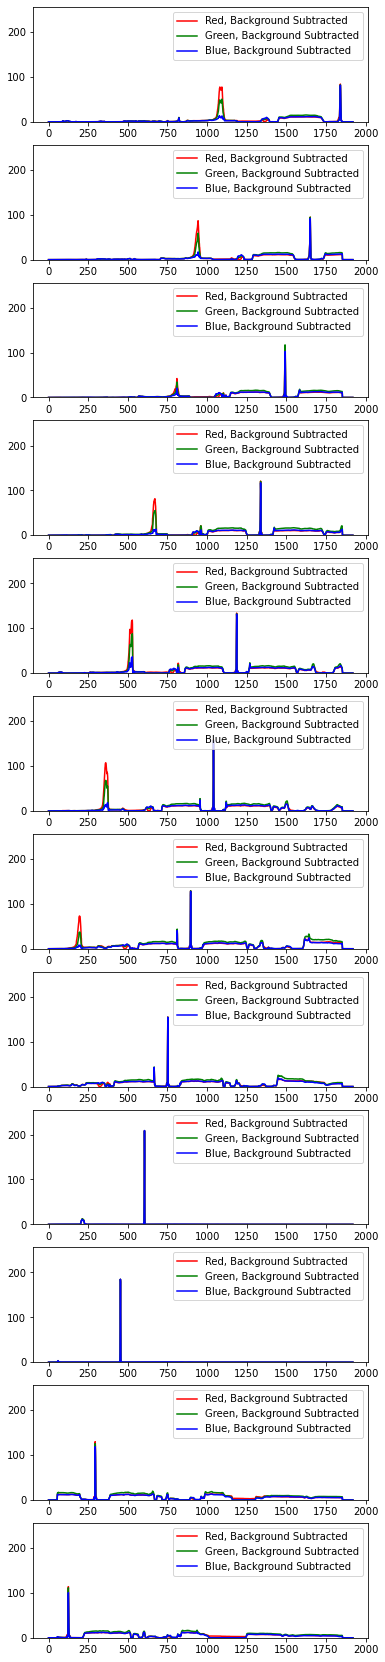

In [3]:
fig, ax = plt.subplots(len(info_list), 1, figsize=(6,30))

mean_frame_s = []

for i_cap, (title, fn_on, fn_off) in enumerate(info_list):
    print(title, fn_on, fn_off)

    vidcap_lighton = cv2.VideoCapture(os.path.join(data_dir, fn_on))
    vidcap_lightoff = cv2.VideoCapture(os.path.join(data_dir, fn_off))

    n_frames_lighton = int(vidcap_lighton.get(cv2.CAP_PROP_FRAME_COUNT))
    n_frames_lightoff = int(vidcap_lightoff.get(cv2.CAP_PROP_FRAME_COUNT))

    mean_frame_lighton = np.empty((int(vidcap_lighton.get(cv2.CAP_PROP_FRAME_HEIGHT)), int(vidcap_lighton.get(cv2.CAP_PROP_FRAME_WIDTH)),3), dtype=int)
    mean_frame_lightoff = np.empty((int(vidcap_lightoff.get(cv2.CAP_PROP_FRAME_HEIGHT)), int(vidcap_lightoff.get(cv2.CAP_PROP_FRAME_WIDTH)),3), dtype=int)

    successes = 0

    for i_image in range(n_frames_lighton):
        success, image = vidcap_lighton.read()
        if success:
            mean_frame_lighton = mean_frame_lighton + image
            successes += 1
    mean_frame_lighton = mean_frame_lighton.astype(float) / successes

    successes = 0
    for i_image in range(n_frames_lightoff):
        success, image = vidcap_lightoff.read()
        if success:
            mean_frame_lightoff = mean_frame_lightoff + image
            successes += 1
    mean_frame_lightoff = mean_frame_lightoff.astype(float) / successes

    mean_frame_s.append(
        (title, mean_frame_lighton / 255, mean_frame_lightoff / 255, (mean_frame_lighton - mean_frame_lightoff) / 255))
    
#------------------------------------------------------------------------------
# Plot
#------------------------------------------------------------------------------
    
    i_height = np.argmax(np.max(np.mean((mean_frame_lighton - mean_frame_lightoff), axis=-1), axis=1)) # height of greatest value pixel

    # channelwise plot at i_height line of pixels
    ax[i_cap].plot(mean_frame_lighton[i_height,:,0] - mean_frame_lightoff[i_height,:1,0], color='red', label="Red, Background Subtracted") 
    ax[i_cap].plot(mean_frame_lighton[i_height,:,1] - mean_frame_lightoff[i_height,:1,1], color='green', label="Green, Background Subtracted")
    ax[i_cap].plot(mean_frame_lighton[i_height,:,2] - mean_frame_lightoff[i_height,:1,2], color='blue', label="Blue, Background Subtracted")
    
    ax[i_cap].set_ylim(0, 256)
    
    ax[i_cap].legend()

# bounding box and graph of intensities at height of brightest pixel for every mean background subtracted frame in mean_frame_s

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

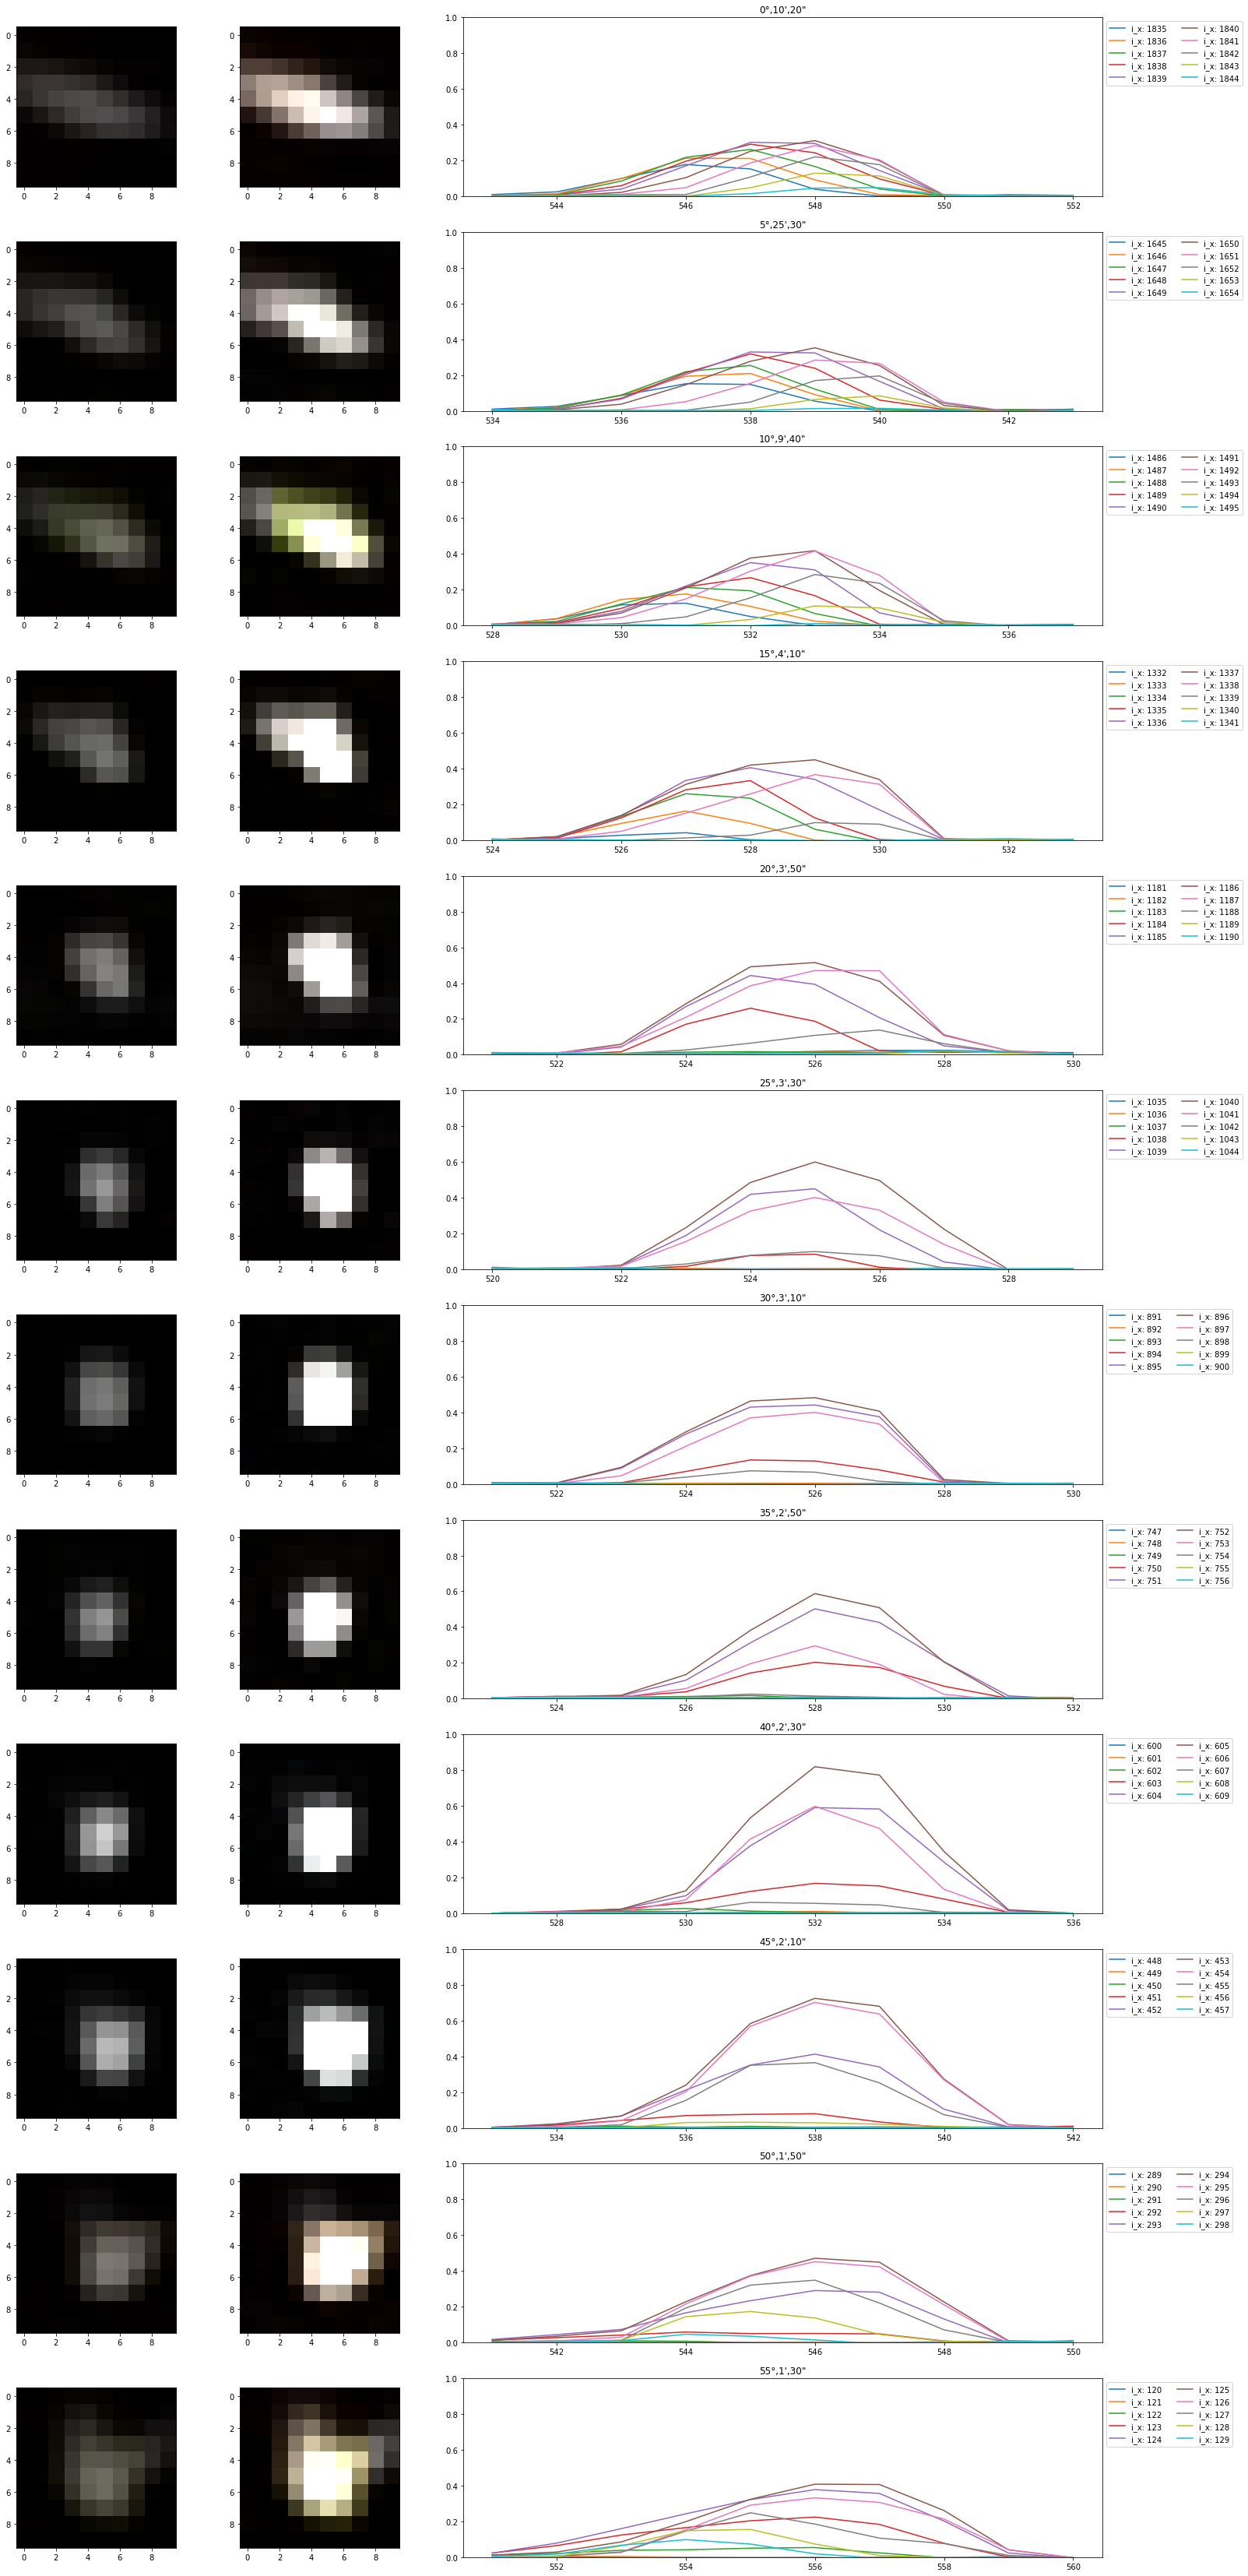

In [4]:
display_hw_px = 5

fig, ax = plt.subplots(len(info_list),3, figsize=(25,5*len(info_list)), gridspec_kw=dict(width_ratios=[1,1,4]))

for i_cap, ((title, fn_on, fn_off), (_, _, _, mean_frame_background_subtracted)) in enumerate(zip(info_list, mean_frame_s)):
    mean_grayscale_frame_background_subtracted = np.mean(mean_frame_background_subtracted, axis=-1)
    max_grayscale = np.max(mean_grayscale_frame_background_subtracted)
    ((i_y_max,), (i_x_max,)) = np.where(mean_grayscale_frame_background_subtracted == max_grayscale)
    
    weighting_function = lambda image: 10**image - 1
    image_weighted = weighting_function(mean_frame_background_subtracted[
    i_y_max - display_hw_px:i_y_max + display_hw_px,
    i_x_max - display_hw_px:i_x_max + display_hw_px])
    
    ax0 = ax[i_cap][0]
    ax0.imshow(
    mean_frame_background_subtracted[
    i_y_max - display_hw_px:i_y_max + display_hw_px,
    i_x_max - display_hw_px:i_x_max + display_hw_px],
    cmap=plt.cm.gray)
    
    ax1 = ax[i_cap][1]
    ax1.imshow(image_weighted,
    cmap=plt.cm.gray)
    
    ax2 = ax[i_cap][2]
    for i_x in range(i_x_max - display_hw_px, i_x_max + display_hw_px):
        ax2.plot(np.arange(i_y_max - display_hw_px, i_y_max + display_hw_px),
            mean_grayscale_frame_background_subtracted[
            i_y_max - display_hw_px:i_y_max + display_hw_px, i_x],
            label=f"i_x: {i_x}")
        
    ax2.set_ylim(0,1)
    ax2.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=2)
    ax2.set_title(title)

In [5]:
def weighting_function(image):
    return 10**image - 1
    # return image

In [6]:
def find_image_peak(mean_grayscale_frame_background_subtracted, box_threshold = 0.2, box_padding = 0, weighting_function = lambda image: 10**image - 1):


    max_over_x = np.max(mean_grayscale_frame_background_subtracted, axis=0)
    #max_over_x_over_threshold = max_over_x > box_threshold
    max_over_x_over_threshold = np.where(max_over_x > box_threshold, max_over_x, 0)

    i_xside_box_start = np.argmax(max_over_x_over_threshold) - box_padding
    i_xside_box_end = len(max_over_x_over_threshold) - np.argmax(max_over_x_over_threshold[::-1]) + box_padding

    max_over_y = np.max(mean_grayscale_frame_background_subtracted, axis=1)
    #max_over_y_over_threshold = max_over_y > box_threshold
    max_over_y_over_threshold = np.where(max_over_y > box_threshold, max_over_y, 0)
    i_yside_box_start = np.argmax(max_over_y_over_threshold) - box_padding
    i_yside_box_end = len(max_over_y_over_threshold) - np.argmax(max_over_y_over_threshold[::-1]) + box_padding


    x_ = np.arange(i_xside_box_end - i_xside_box_start)
    y_ = np.arange(i_yside_box_end - i_yside_box_start)

    X, Y = np.meshgrid(x_, y_)

    image_weighted = weighting_function(mean_grayscale_frame_background_subtracted[i_yside_box_start:i_yside_box_end, i_xside_box_start:i_xside_box_end])
    image_weighted_sum = np.sum(image_weighted)


    x_mean = np.sum(X * image_weighted) / image_weighted_sum

    y_mean = np.sum(Y * image_weighted) / image_weighted_sum

    return (i_xside_box_start + x_mean, i_yside_box_start + y_mean), (i_xside_box_start, i_xside_box_end, i_yside_box_start, i_yside_box_end)


In [7]:
image_peak_s = np.array([ find_image_peak(np.mean(mean_frame_background_subtracted,axis=-1))[0]
    for title, mean_frame_lighton, mean_frame_lightoff, mean_frame_background_subtracted in mean_frame_s ])
        
print('image_peak_s=',image_peak_s)

image_peak_s= [[1840.  548.]
 [1650.  539.]
 [1491.  533.]
 [1337.  529.]
 [1186.  526.]
 [1040.  525.]
 [ 896.  526.]
 [ 752.  528.]
 [ 605.  532.]
 [ 453.  538.]
 [ 294.  546.]
 [ 125.  556.]]


# Peak pixels bunches

In [10]:
peak_pixels_s = [] 
bbox_s = []


# for every item in info_list
for i_cap, ((title, fn_on, fn_off), (title, mean_frame_lighton, mean_frame_lightoff, mean_frame_background_subtracted)) in enumerate(zip(info_list, mean_frame_s)):
    
    vidcap_lighton = cv2.VideoCapture(os.path.join(data_dir, fn_on))

    n_frames_lighton = int(vidcap_lighton.get(cv2.CAP_PROP_FRAME_COUNT))

    peak_pixels = []
    frames = []
    # for every frame in the lighton video
    for i_image in range(n_frames_lighton):
        success, image = vidcap_lighton.read()
        if success:
            # subtract the corresponding lightoff frame, find peak pixel in the subtracted frame
            image_peak, image_bbox = find_image_peak(np.mean(image/255. - mean_frame_lightoff, axis=-1), box_padding=0)
            # append the peak pixel
            peak_pixels.append(list(image_peak))
            frames.append(list(image_bbox))
    
    
    peak_pixels_s.append(np.array(peak_pixels))
    bbox_s.append(np.array(frames))
    
# peak pixels   -> one item in info_list
# peak_pixels_s -> all items in info_list
    
# print(peak_pixels_s[1])

# Scatter plot of peak pixels

<ipython-input-9-afcb07085bc3>:7: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  fig.autofmt_xdate()


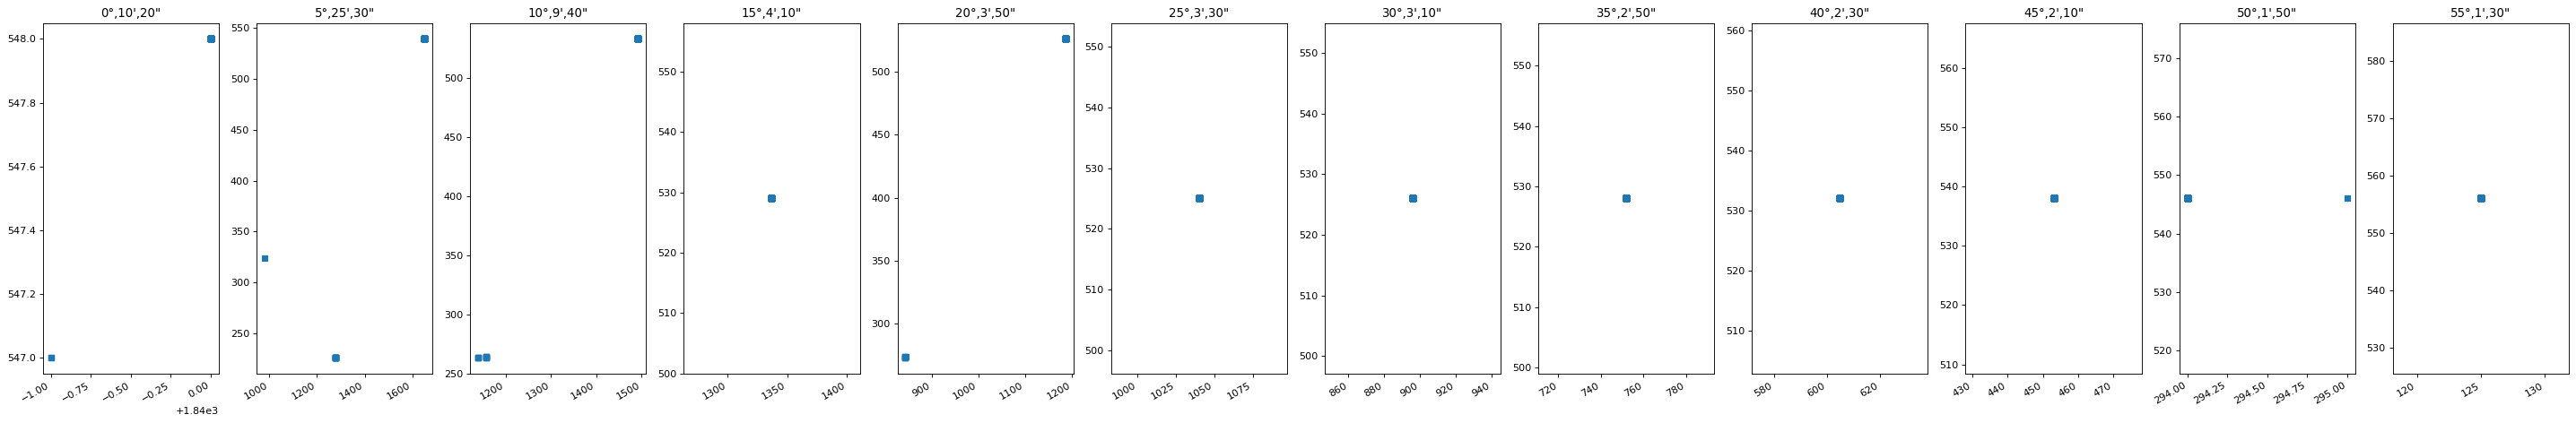

In [9]:
fig, ax = plt.subplots(1, len(info_list), figsize=(3*len(info_list),6), constrained_layout= True, dpi = 80)

for i_cap, ((title, fn_on, fn_off), peak_pixels) in enumerate(zip(info_list, peak_pixels_s)):
    axi = ax[i_cap]
    axi.scatter(peak_pixels[50:,0], peak_pixels[50:,1],marker='s')
    axi.set_title(title)
    fig.autofmt_xdate()
    plt.tight_layout()

# Standard Deviation in pixels

In [11]:
peak_pixel_std_s = np.array([ np.std(peak_pixels[50:], axis=0) for peak_pixels in peak_pixels_s ])
print('peak_pixel_std_s= ',peak_pixel_std_s)

peak_pixel_std_s=  [[2.45670100e-01 2.45670100e-01]
 [1.81240255e+02 1.44722843e+02]
 [1.58454902e+02 1.24931298e+02]
 [0.00000000e+00 0.00000000e+00]
 [1.37321633e+02 1.01411518e+02]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [1.45061694e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]]


In [ ]:
range_m = 6.

horizontal_fov_twosided_radians = np.radians(57.09) # empirical, 56.2135442 if calculated from datasheet info
vertical_fov_twosided_radians = np.radians(33.44) # calculated from datasheet info

pixel_half_width = 1797/2    # 56 is the last black pixel from left (undistorted images have black regions on borders)
pixel_half_height = 915/2    #  72 is the last black pixel from top

f_x = pixel_half_width/math.tan(horizontal_fov_twosided_radians/2)
f_y = pixel_half_height/math.tan(vertical_fov_twosided_radians/2)

print('f_x= ',f_x) # focal length along x
print('f_y= ',f_y) # focal length along y


These focal lengths can be matched against those obtained from camera matrix during calibration.
(Check calib_log files on the repository)
f_x is close enough, f_y doesn't match well, because we did not use empirical(obtained from observation) vertical fov. We can use total station's get position api to do that. 

In [14]:
peak_radian_std_s = np.arctan(peak_pixel_std_s / np.array([f_x, f_y]))
print('peak_radian_std_s= ',peak_radian_std_s)

peak_radian_std_s=  [[1.48734465e-04 1.61307203e-04]
 [1.09289901e-01 9.47406669e-02]
 [9.56396561e-02 8.18467487e-02]
 [0.00000000e+00 0.00000000e+00]
 [8.29469963e-02 6.64887419e-02]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [8.78237670e-05 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]]


In [15]:
peak_cross_position_std_s = peak_pixel_std_s / np.array([f_x, f_y])
print('peak_cross_position_std_s= ',peak_cross_position_std_s)

peak_cross_position_std_s=  [[1.48734466e-04 1.61307204e-04]
 [1.09727120e-01 9.50251459e-02]
 [9.59323305e-02 8.20300005e-02]
 [0.00000000e+00 0.00000000e+00]
 [8.31377520e-02 6.65868922e-02]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [8.78237672e-05 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]]


In [16]:
peak_pixel_median_s = np.array([ np.median(peak_pixels, axis=0) for peak_pixels in peak_pixels_s ])
print('peak_pixel_median_s= ',peak_pixel_median_s)

peak_pixel_median_s=  [[1840.  548.]
 [1650.  539.]
 [1491.  533.]
 [1337.  529.]
 [1186.  526.]
 [1040.  525.]
 [ 896.  526.]
 [ 752.  528.]
 [ 605.  532.]
 [ 453.  538.]
 [ 294.  546.]
 [ 125.  556.]]


In [17]:
image_center = [954.5,529.5]  # [56 + 1797/2 , 72 + 915/2]
peak_angle_median_s = np.arctan(-(peak_pixel_median_s-image_center) / np.array([f_x, f_y]))
print('peak_angle_median_s= ',peak_angle_median_s)

peak_angle_median_s=  [[-4.92110820e-01 -1.21465189e-02]
 [-3.98538970e-01 -6.23762746e-03]
 [-3.14059805e-01 -2.29809903e-03]
 [-2.27563277e-01  3.28300428e-04]
 [-1.39248502e-01  2.29809903e-03]
 [-5.17175552e-02  2.95469536e-03]
 [ 3.54024804e-02  2.29809903e-03]
 [ 1.21989520e-01  9.84901001e-04]
 [ 2.08519846e-01 -1.64150072e-03]
 [ 2.94774500e-01 -5.58104953e-03]
 [ 3.80404874e-01 -1.08334907e-02]
 [ 4.65405135e-01 -1.73981676e-02]]


In [18]:
nominal_angle_radians = np.radians(np.array([
    0 + 10/60 + 20/3600,
    5 + 25/60 + 30/3600,
    10 + 9/60 + 40/3600,
    15 + 4/60 + 10/3600,
    20 + 3/60 + 50/3600,
    25 + 3/60 + 30/3600,
    30 + 3/60 + 10/3600,
    35 + 2/60 + 50/3600,
    40 + 2/60 + 30/3600,
    45 + 2/60 + 10/3600,
    50 + 1/60 + 50/3600,
    55 + 1/60 + 30/3600,

]))- np.radians(57.09/2)


print('nominal_angle_radians=',nominal_angle_radians)

nominal_angle_radians= [-0.49519839 -0.40352012 -0.32085939 -0.23519281 -0.14802331 -0.06085381
  0.02631569  0.11348519  0.20065469  0.28782419  0.37499369  0.46216319]


In [19]:
computed_angles_radians = peak_angle_median_s[:,0] 
print('computed_angles_radians:', computed_angles_radians)

computed_angles_radians: [-0.49211082 -0.39853897 -0.31405981 -0.22756328 -0.1392485  -0.05171756
  0.03540248  0.12198952  0.20851985  0.2947745   0.38040487  0.46540514]


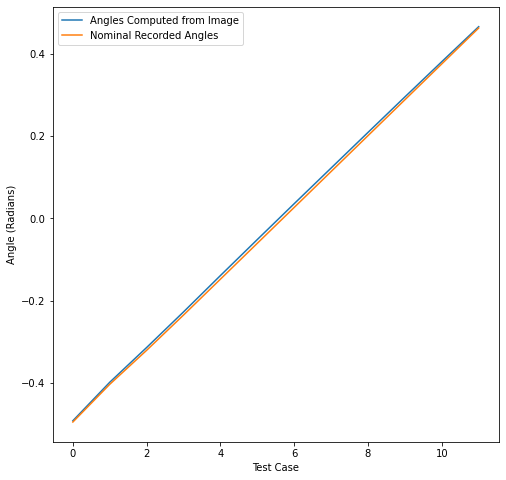

In [20]:
plt.figure(figsize=(8, 8))
plt.plot(computed_angles_radians, label="Angles Computed from Image")
plt.plot(nominal_angle_radians, label="Nominal Recorded Angles")
plt.xlabel("Test Case")
plt.ylabel("Angle (Radians)")
plt.legend(loc='best')
plt.show()

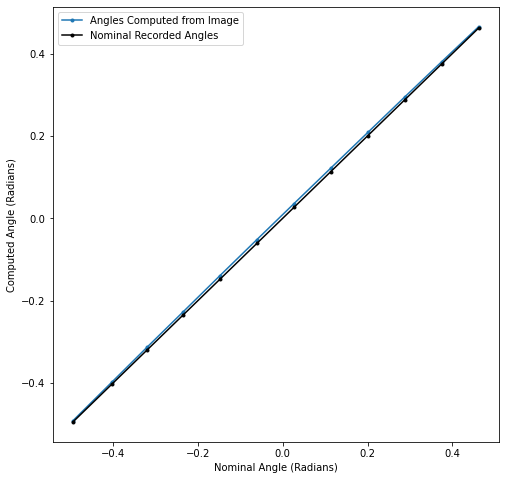

In [21]:
plt.figure(figsize=(8, 8))
plt.plot(nominal_angle_radians, computed_angles_radians, marker='.', label="Angles Computed from Image")
plt.plot(nominal_angle_radians, nominal_angle_radians, color='black', marker='.',label="Nominal Recorded Angles")
plt.xlabel("Nominal Angle (Radians)")
plt.ylabel("Computed Angle (Radians)")
plt.legend(loc='best')
plt.show()

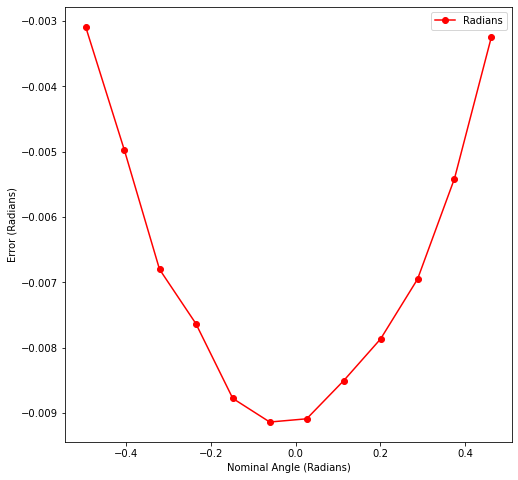

In [22]:
error = nominal_angle_radians-computed_angles_radians

plt.figure(figsize=(8, 8))
plt.plot(nominal_angle_radians, error, '-ro',label="Radians")
plt.xlabel("Nominal Angle (Radians)")
plt.ylabel("Error (Radians)")
plt.legend(loc='best')
plt.show()

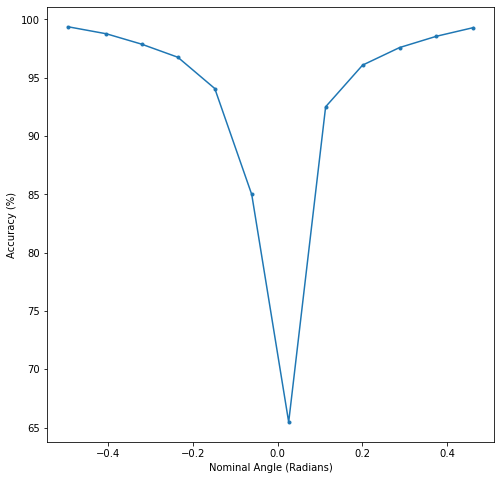

In [23]:
plt.figure(figsize=(8, 8))
plt.plot(nominal_angle_radians, 100*(1-abs(error/nominal_angle_radians)), marker='.')
plt.xlabel("Nominal Angle (Radians)")
plt.ylabel("Accuracy (%)")
plt.show()

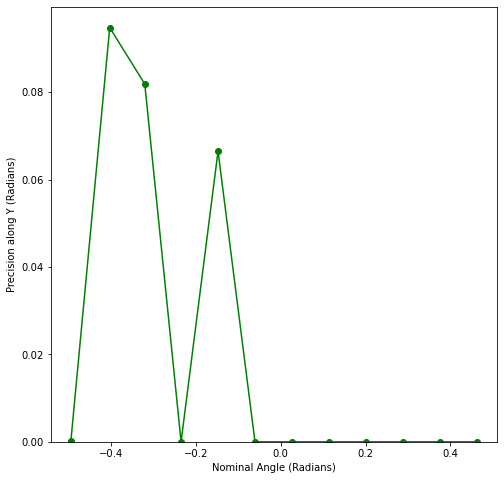

In [24]:
plt.figure(figsize=(8, 8))
plt.plot(nominal_angle_radians, peak_radian_std_s[:,1], '-go',label="Radians")
plt.ylim(bottom=0)
plt.xlabel("Nominal Angle (Radians)")
plt.ylabel("Precision along Y (Radians)")
plt.show()

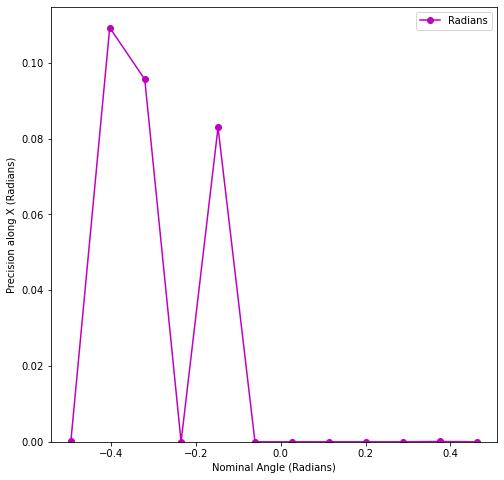

In [25]:
plt.figure(figsize=(8, 8))
plt.plot(nominal_angle_radians, peak_radian_std_s[:,0], '-mo',label="Radians")
plt.ylim(bottom=0)
plt.xlabel("Nominal Angle (Radians)")
plt.ylabel("Precision along X (Radians)")
plt.legend(loc='best')
plt.show()